### 소상공인 시장진흥공단 상가(상권)정보 201912월 기준
* https://www.data.go.kr/dataset/15012005/fileData.do

In [1]:
!mkdir .\data\franchise

In [3]:
%ls "./data/franchise"

 D 드라이브의 볼륨: Data
 볼륨 일련 번호: D818-A4B8

 d:\lec\05.python\data\franchise 디렉터리

2024-04-05  오후 12:12    <DIR>          .
2024-04-05  오후 12:12    <DIR>          ..
2020-12-01  오전 12:00       264,920,940 상가업소정보_201912_01.csv
2020-12-01  오전 12:00       318,748,011 소상공인시장진흥공단_상가업소정보_201812_4.csv
2020-12-01  오전 12:00               589 소상공인시장진흥공단_전국 카페업소 수(2015년12월_2019년9월).csv
               3개 파일         583,669,540 바이트
               2개 디렉터리  675,620,564,992 바이트 남음


In [6]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 한글처리
plt.rcParams['font.family'] = 'D2Coding'
plt.rcParams['axes.unicode_minus'] = False

In [7]:
!pip install plotnine
!pip install folium

!pip show plotnine
!pip show folium

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
    --------------------------------------- 0.0/1.3 MB 660.6 kB/s eta 0:00:02
   ----------------------------- ---------- 1.0/1.3 MB 10.1 MB/s eta 0:00:01
   -------------------------------- ------- 1.0/1.3 MB 11.0 MB/s eta 0:00:01
   -------------------------------- ------- 1.0/1.3 MB 11.0 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 6.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/127.3 kB ? eta -:--:--
   ---------------------------------------- 127.3/127.3 kB 7.8 MB/s eta 0:00:00
Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/100.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/100.0 kB ? eta -:--:--
   ---- --------------------

In [8]:
# 데이터시각화 tool
from plotnine import * # r의 ggplot2 시각화패키지를 python에서도 사용
import folium          # 지도시각화 패키지
import re

In [10]:
# 상가업소정보
shop = pd.read_csv('./data/franchise/상가업소정보_201912_01.csv'
                   , encoding='utf-8'
                   , delimiter='|'
                   , engine='python')
display(shop.info())
display(shop.head())
display(shop.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

None

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
3,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,...,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1,26,128.980455,35.159774
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,...,1171010500102560005010490,NaN,서울특별시 송파구 가락로 71,138846,5690.0,NaN,1,NaN,127.104071,37.500249


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
573675,16394290,비파티세리공덕,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1144010200101050067001710,NaN,서울특별시 마포구 마포대로14길 4,121801,4211.0,NaN,NaN,NaN,126.955059,37.548618
573676,16336474,앤탑PC방,NaN,N,관광/여가/오락,N01,PC/오락/당구/볼링등,N01A01,인터넷PC방,R91222,...,1120011500102890015004255,으뜸프린팅(주),서울특별시 성동구 성수일로8길 37,133834,4794.0,NaN,2,NaN,127.054615,37.545853
573677,16336218,오즈아레나PC방,NaN,N,관광/여가/오락,N01,PC/오락/당구/볼링등,N01A01,인터넷PC방,R91222,...,1168010800101650008000001,한맥빌딩,서울특별시 강남구 강남대로 492,135825,6119.0,NaN,2,NaN,127.024102,37.506202
573678,16335152,파인트리네일,NaN,F,생활서비스,F01,이/미용/건강,F01A02,발/네일케어,S96119,...,1156011000100230000000001,서울국제금융센터,서울특별시 영등포구 국제금융로 10,150945,7326.0,NaN,1,NaN,126.924863,37.525172
573679,16335150,마이리틀네일,NaN,F,생활서비스,F01,이/미용/건강,F01A02,발/네일케어,S96119,...,1132010700108120000018489,현대타운아파트,서울특별시 도봉구 도봉로114길 22-8,132691,1455.0,101,NaN,NaN,127.035145,37.647099


In [12]:
# 실습01. 상권업종소분류명에 '커피'가 포함된 자료만 추출
# str.contains(), str.match()
coffee = shop[shop.상권업종소분류명.str.contains('커피')]
print(coffee.shape)
print(coffee.columns)

(23488, 39)
Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')


In [21]:
# 실습02. 상호명으로 몇 개의 커피점이 있는가?
# unique()
coffee.상호명.unique()
print(len(coffee.상호명.unique()), coffee.상호명.unique().shape)

15438 (15438,)


In [22]:
# 실습03. 상호명에 '스타벅스'가 포함된 상가의 건수?
# contains()
coffee.상호명.str.contains('스타벅스')
coffee.loc[coffee.상호명.str.contains('스타벅스')]
coffee.loc[coffee.상호명.str.contains('스타벅스'), '상호명']
coffee.loc[coffee.상호명.str.contains('스타벅스'), '상호명'].unique().shape

(230,)

In [25]:
# 실습04. '시도명'의 결측치확인 (실습자료는 서울과 부산지역만 있다.)
# 결측의 건수와 시도별 데이터건수를 출력
# isnull(), isna(), value_counts()
print(f'시도명 자료에 결측치의 건수 = {coffee.시도명.isnull().sum()}')
print(f'시도명의 건수 = {coffee.시도명.value_counts()}')

시도명 자료에 결측치의 건수 = 0
시도명의 건수 = 시도명
서울특별시    18608
부산광역시     4880
Name: count, dtype: int64


In [27]:
# 시군구명확인
display(coffee.시군구명.unique())
display(shop.시군구명.unique())

array(['강남구', '서초구', '성북구', '영등포구', '중구', '구로구', '종로구', '도봉구', '마포구',
       '북구', '기장군', '광진구', '남구', '은평구', '서대문구', '양천구', '용산구', '해운대구',
       '관악구', '성동구', '송파구', '사상구', '금천구', '동대문구', '사하구', '강서구', '금정구',
       '동작구', '중랑구', '강북구', '강동구', '수영구', '연제구', '노원구', '부산진구', '동구',
       '동래구', '영도구', '서구'], dtype=object)

array(['강남구', '금천구', '사상구', '송파구', '광진구', '강서구', '중구', '서초구', '성북구',
       '구로구', '영등포구', '서대문구', '동대문구', '노원구', '동래구', '부산진구', '동작구', '수영구',
       '동구', '성동구', '영도구', '관악구', '강동구', '양천구', '종로구', '해운대구', '금정구',
       '연제구', '강북구', '은평구', '기장군', '중랑구', '도봉구', '마포구', '사하구', '서구',
       '용산구', '북구', '남구'], dtype=object)

In [30]:
# 상권업종중분류명
display(coffee.상권업종중분류명.unique())
display(coffee.상권업종중분류명.value_counts())
print()

display(shop.상권업종중분류명.unique())
display(shop.상권업종중분류명.value_counts())

array(['커피점/카페'], dtype=object)

상권업종중분류명
커피점/카페    23488
Name: count, dtype: int64

array(['유흥주점', '커피점/카페', '패스트푸드', '대중목욕탕/휴게', '일식/수산물', '분식', '한식',
       '음/식료품소매', '건강/미용식품', '선물/팬시/기념품', '양식', '중식', '종합소매점', '병원',
       '화장품소매', '학원-어학', '의복의류', 'PC/오락/당구/볼링등', '별식/퓨전요리', '학원-자격/국가고시',
       '도서관/독서실', '가정/주방/인테리어', '학원-음악미술무용', '무도/유흥/가무', '이/미용/건강',
       '사진/광학/정밀기기소매', '세탁/가사서비스', '닭/오리요리', '책/서적/도서', '예식/의례/관혼상제',
       '광고/인쇄', '학원-예능취미체육', '운송/배달/택배', '기타음식업', '부동산중개', '주유소/충전소',
       '철물/난방/건설자재소매', '유아교육', '주택수리', '사무/문구/컴퓨터', '약국/한약방', '물품기기대여',
       '자동차/이륜차', '자동차/자동차용품', '가구소매', '개인/가정용품수리', '학원-보습교습입시', '기타판매업',
       '유사의료업', '학원기타', '개인서비스', '시계/귀금속소매', '사진', '요가/단전/마사지', '학문교육기타',
       '가방/신발/액세서리', '대행업', '페인트/유리제품소매', '중고품소매/교환', '인력/고용/용역알선',
       '애견/애완/동물', '음식배달서비스', '가전제품소매', '유아용품', '학원-컴퓨터', '기타서비스업',
       '운동/경기용품소매', '장례/묘지', '법무세무회계', '취미/오락관련소매', '연극/영화/극장',
       '평가/개발/관리', '수의업', '호텔/콘도', '모텔/여관/여인숙', '분양', '제과제빵떡케익',
       '학원-창업취업취미', '의약/의료품소매', '행사/이벤트', '경마/경륜/성인오락', '예술품/골동품/수석/분재',
       '부페', '의료관련서비스업'

상권업종중분류명
한식          59725
이/미용/건강     44822
종합소매점       36098
의복의류        32956
유흥주점        24017
            ...  
스포츠/운동         54
운영관리시설         25
유스호스텔          18
실외운동시설         16
부동산관련서비스        5
Name: count, Length: 94, dtype: int64

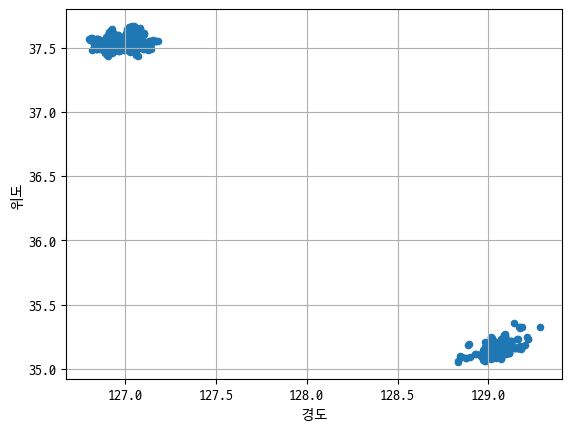

In [43]:
# 실습05. 시각화(scatter), shop에서 1000건만 선택해서 시각화하기(위치표시)
# 1) DataFrame.plot()
shop[:1000].plot.scatter(y='위도', x='경도', grid=True)
plt.show()

###### ggplot
<img src="./images/26.데이터분석_실습01.전국도시공원_01_ggplot_cheatsheet.PNG">
<img src="./images/26.데이터분석_실습01.전국도시공원_02_ggplot_cheatsheet.PNG">

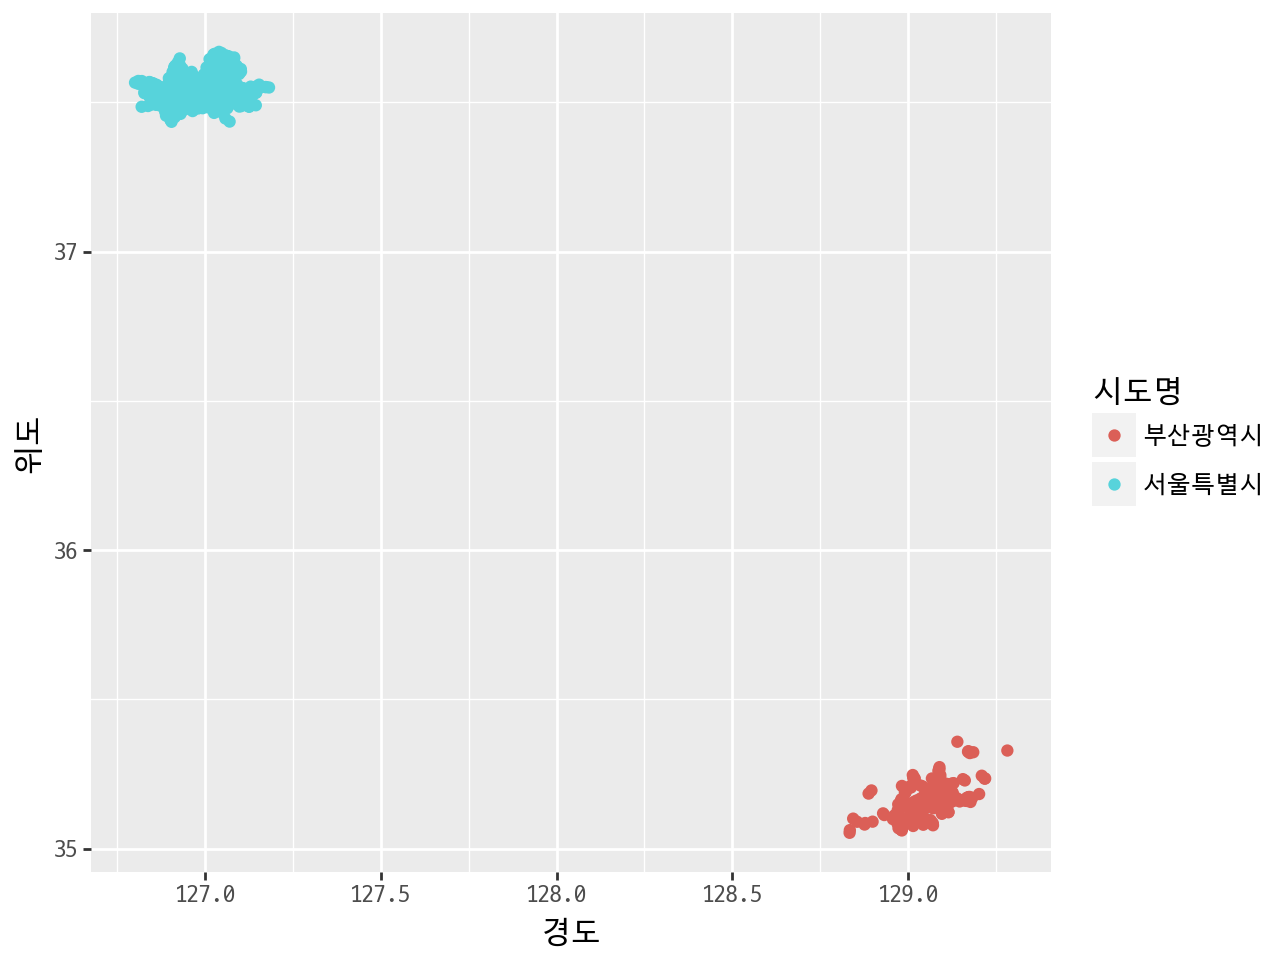

In [42]:
# 2) plotnine, ggplot2
(ggplot(shop[:1000])
 + aes(x='경도', y='위도', color='시도명')
 + geom_point()
 + theme(text=element_text(family='D2Coding'))
)

In [62]:
# 3) folium 으로 시각화
shop_df = shop[:1000]
lng = shop_df.위도.mean()
lat = shop_df.경도.mean()
print(lng, lat)

m = folium.Map(location=[lng, lat], zoom_start=7)

for s in shop_df.index:
    shop_name = shop_df.loc[s, '상호명'] + '-' +  shop_df.loc[s, '도로명주소']
    # print(shop_name)
    # break
    icon_color = 'blue'
    folium.CircleMarker(
        location=[shop_df.loc[s, '위도'], shop_df.loc[s, '경도']],
        radius=2,
        popup = shop_name,
        color = icon_color,
        fill = True,
        fill_color = 'green',
        fill_opacity = 0.6,
        tooltip='Hello Folium!!'
    ).add_to(m)
m

36.81962669680732 127.62624275158558


In [67]:
# 실습. contains(), startswith(), copy()
# 1) 서울자료만 추출, 건수와 결측치건수 출력 - contains(), startswith(), copy()
df_seoul = shop.loc[shop.시도명.str.startswith('서울')].copy()
print(df_seoul.shape)
print(df_seoul.isnull().sum())

(407376, 39)
상가업소번호            0
상호명               0
지점명          349773
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      24726
표준산업분류명       24726
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         77159
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        359537
건물관리번호            0
건물명          208611
도로명주소             0
구우편번호             0
신우편번호             2
동정보          375585
층정보          129767
호정보          348313
경도                0
위도                0
dtype: int64


In [69]:
# 2) 서울지역의 기초통계정보 - dscribe()
display(df_seoul.describe())

# object(객체)도 포함한 기초통계정보
display(df_seoul.describe(include=np.object_))

,상가업소번호,시도코드,시군구코드,행정동코드,법정동코드,지번코드,대지구분코드,지번본번지,지번부번지,도로명코드,건물본번지,건물부번지,구우편번호,신우편번호,경도,위도
count,4.073760e+05,407376.0,407376.000000,4.073760e+05,4.073760e+05,4.073760e+05,407376.000000,407376.000000,330217.000000,4.073760e+05,407376.000000,47839.000000,407376.000000,407374.000000,407376.000000,407376.000000
mean,2.044920e+07,11.0,11442.863055,1.144348e+09,1.144297e+09,1.144299e+18,1.000906,410.067994,35.079875,1.144322e+11,154.607058,7.600640,136317.870034,5180.542749,126.996900,37.544853
std,5.305169e+06,0.0,200.617052,2.006030e+07,2.006098e+07,2.006119e+16,0.030083,413.743103,108.388772,2.006166e+09,281.216344,9.962542,14219.453712,2099.032557,0.080651,0.048091
min,2.890524e+06,11.0,11110.000000,1.111052e+09,1.111010e+09,1.111010e+18,1.000000,1.000000,1.000000,1.111020e+11,0.000000,1.000000,100011.000000,1000.000000,126.768169,37.434081
25%,1.603173e+07,11.0,11260.000000,1.126052e+09,1.126010e+09,1.126010e+18,1.000000,89.000000,4.000000,1.126030e+11,20.000000,1.000000,131200.000000,3423.000000,126.927946,37.505315
50%,2.226978e+07,11.0,11470.000000,1.147051e+09,1.147010e+09,1.147010e+18,1.000000,289.000000,10.000000,1.147031e+11,51.000000,4.000000,136815.000000,5251.000000,127.012700,37.541061
75%,2.491185e+07,11.0,11650.000000,1.165053e+09,1.165010e+09,1.165010e+18,1.000000,636.000000,27.000000,1.165031e+11,181.000000,10.000000,143849.000000,6720.000000,127.057263,37.571834
max,2.852486e+07,11.0,11740.000000,1.174070e+09,1.174011e+09,1.174070e+18,2.000000,9999.000000,9992.000000,1.174042e+11,3318.000000,250.000000,158885.000000,8866.000000,127.182588,37.692398


,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,...,법정동명,대지구분명,지번주소,도로명,건물관리번호,건물명,도로명주소,동정보,층정보,호정보
count,407376,57603,407376,407376,407376,407376,407376,407376,382650,382650,...,407376,407376,407376,407376,407376,198765,407376,31791,277609,59063
unique,278706,20788,9,9,94,94,697,697,211,211,...,465,2,128702,11994,129310,26607,128427,982,140,2769
top,점프셈교실,강남점,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,...,역삼동,대지,서울특별시 종로구 종로6가 262-1,서울특별시 서초구 신반포로,1111016400102700003012054,동대문종합시장,서울특별시 종로구 종로 266,1,1,1
freq,1788,500,132889,132889,41537,41537,27247,27247,51186,51186,...,12102,407007,981,3543,1013,1023,1000,5538,179169,6547


In [70]:
# 3) 위도,경도의 기초통계정보
display(df_seoul[['위도', '경도']].describe(include=np.number))

,위도,경도
count,407376.000000,407376.000000
mean,37.544853,126.996900
std,0.048091,0.080651
min,37.434081,126.768169
25%,37.505315,126.927946
50%,37.541061,127.012700
75%,37.571834,127.057263
max,37.692398,127.182588


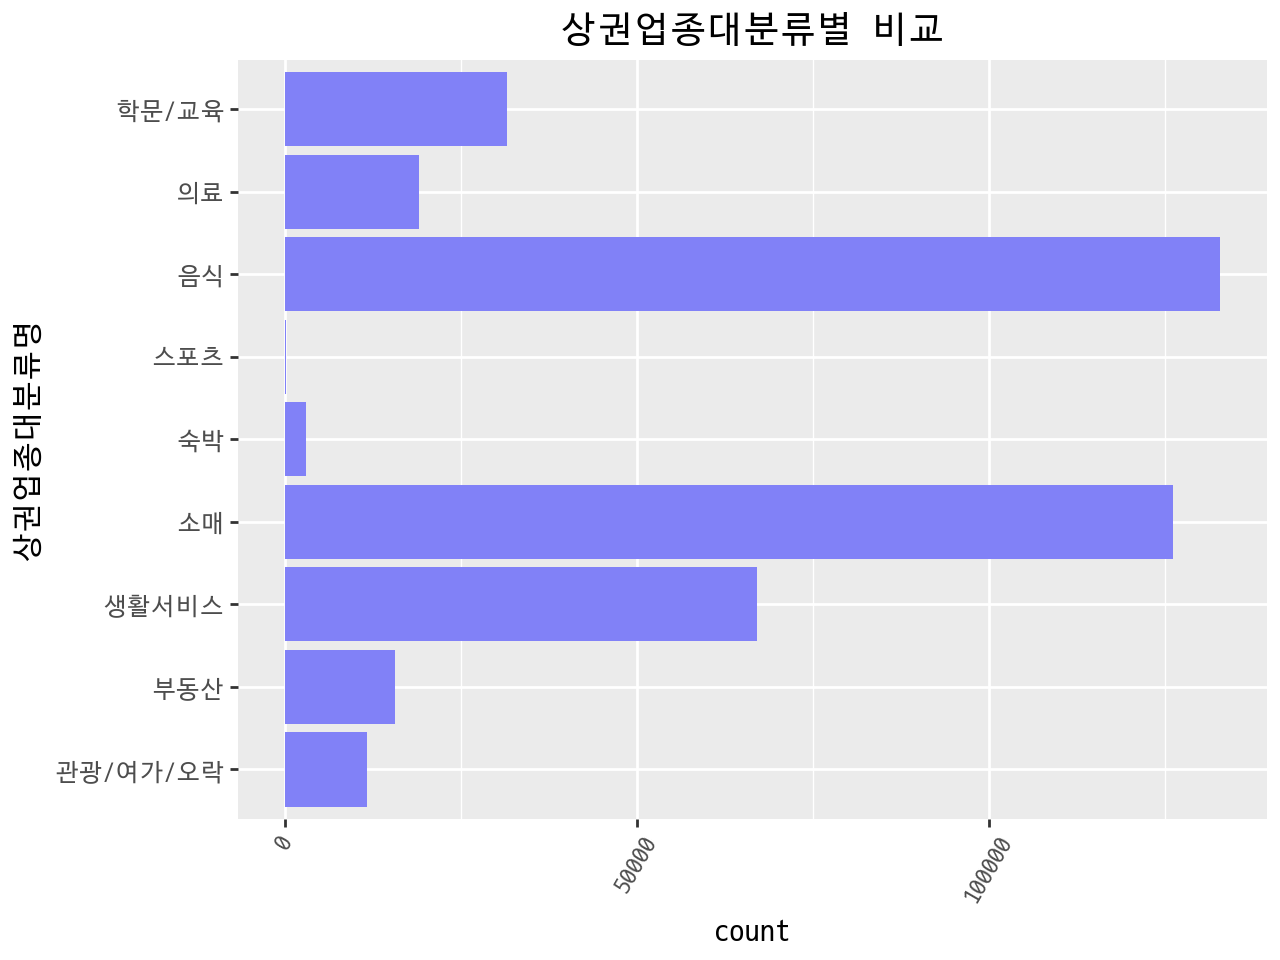

In [81]:
# 실습. 상권업종대분류명 기준으로 바그래프(ggplot2)
# geom_bar()
(ggplot(df_seoul)
 + aes('상권업종대분류명')
 + geom_bar(fill='#8181f7')
 + coord_flip()
 + ggtitle('상권업종대분류별 비교')
 + theme(text=element_text(family='D2Coding')
        , axis_text_x=element_text(rotation=60))
)

In [101]:
# 실습. 상권업종대분류에서 '음식'만 추출해서 상권업종중분류명으로 바그래프로 비교분석하기
# geom_bar()
# 참고 : https://datacarpentry.org/python-ecology-lesson/07-visualization-ggplot-python.html
def food(gubun):
    # 1) data 추출
    df = df_seoul.loc[df_seoul.상권업종대분류명.str.contains(gubun)]
    print(df.shape)

    # 2) 시각화
    return (ggplot(df)
             + aes('상권업종중분류명')
             + geom_bar(fill='#8181ff')
             + coord_flip()
             + ggtitle(f'상권업종중분류({gubun})')
             + theme(text=element_text(family='D2Coding')
                          , axis_text_x=element_text(rotation=60))
            )

(132889, 39)


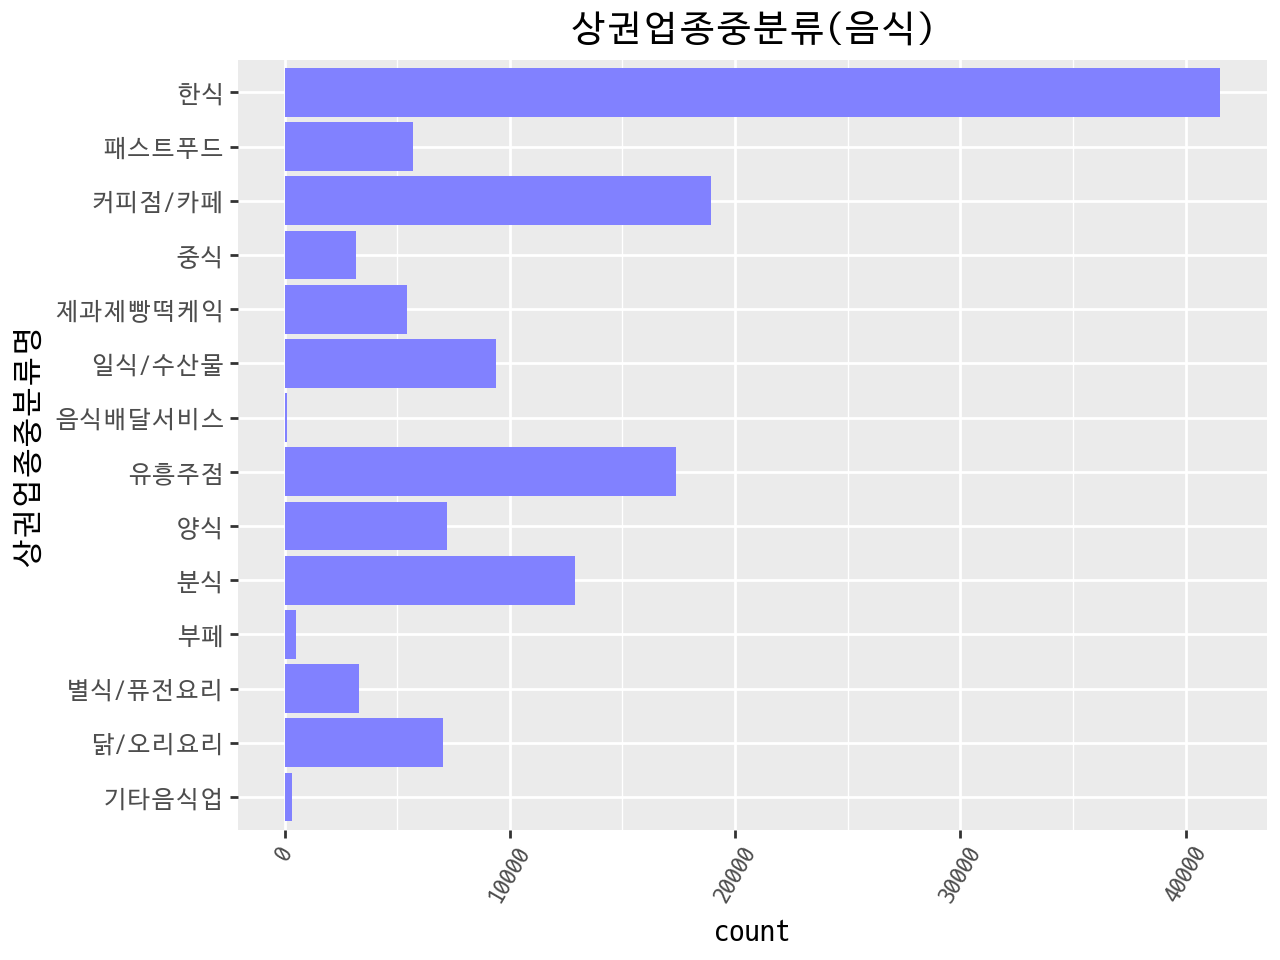

In [102]:
food('음식')

(126209, 39)


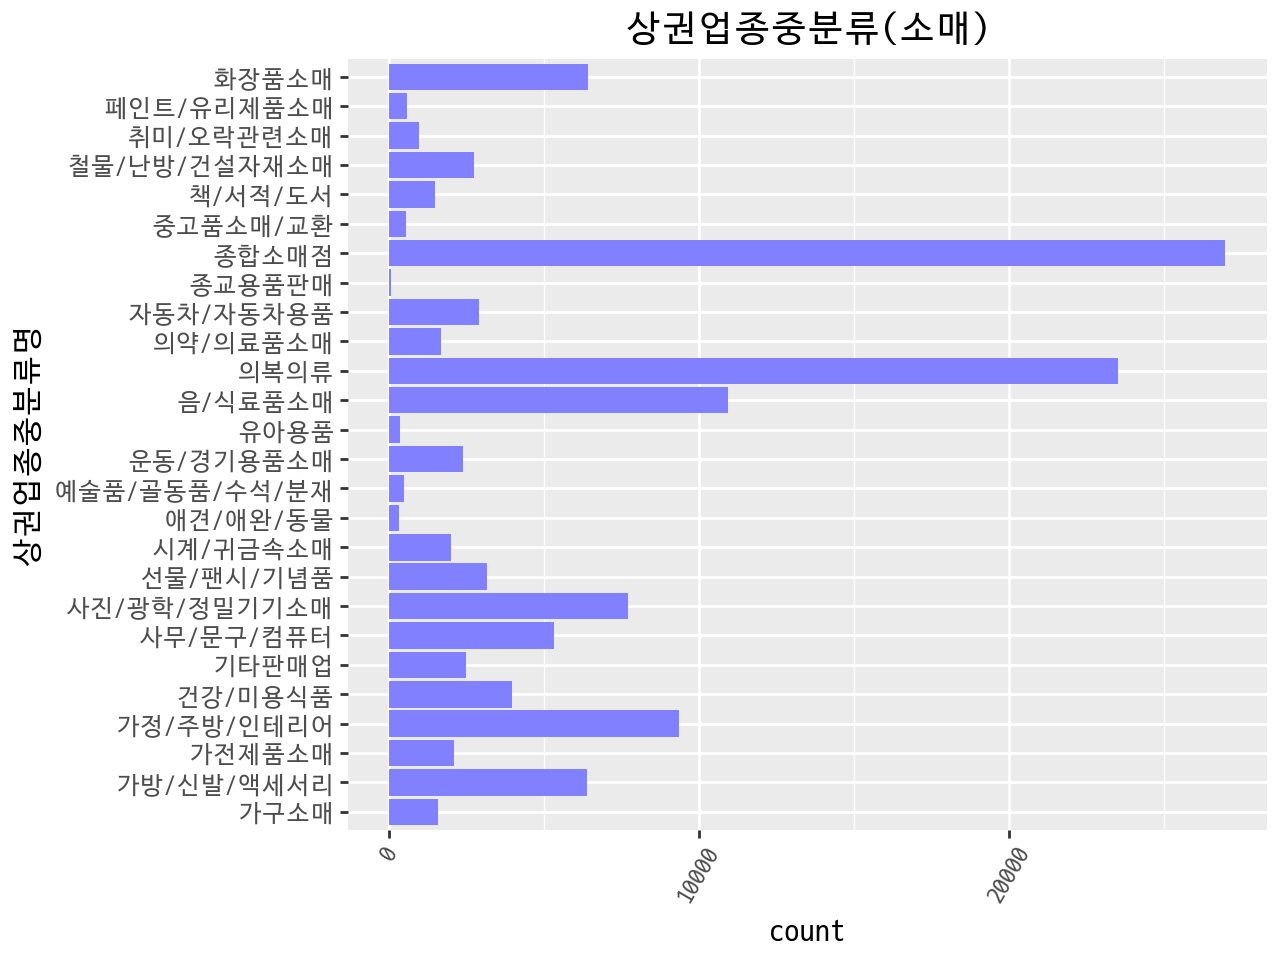

In [103]:
food('소매')

##### 실습1. 웹크롤링자동화 - MySQL에 저장하기
###### 일일환율정보관리 Application만들기
1. database 생성: MySQL.pyweb
2. table 생성
```sql
create table dailycurrencyrate(
    date datetime not null primary key
  , rate float
)
```
3. 네이버의 일일환율정보를 추가하기
   - 해당일에 자료가 있다면 수정 or 삭제후 추가
4. 저장하는 파이썬 프로그램을 작성하기

##### 실습2. 상권업종소분류명 분석

##### 실습3. AWS-EC2 서버등록하기 (until 다음주)

### 상권분석 - 베스킨라빈스와 던킨도너츠의 상권분석

In [112]:
# 1. 서울지역 상호명이 베스킨 or 던킨을 포함한자료
df_31 = df_seoul[df_seoul.상호명.str.contains('베스킨|던킨')].copy()
print(df_31.shape)
# display(df_31.head())

# 2. 필요컬럼만 추출 : '상호명', '지점명', /상권업종대분류명', '상권업종중분류명',
#                      '지번주소', '도로명주소', '경도', '위도'. '시군구명', '행정동명'
df_31 = df_31[['상호명', '지점명', '상권업종대분류명', '상권업종중분류명',
              '지번주소', '도로명주소', '경도', '위도', '시군구명', '행정동명']]
df_31.head()

# 3. 상호명의 건수
df_31['상호명'].value_counts()

(309, 39)


상호명
던킨도너츠            118
베스킨라빈스            77
던킨도넛               5
베스킨라빈스31아이스크림      2
베스킨라빈스아이스크림        2
                ... 
던킨도너츠올림픽공원점        1
던킨도너츠합정역사점         1
비알코리아던킨도너츠중        1
비알코리아던킨도너츠서여       1
던킨도너츠용산센트럴점        1
Name: count, Length: 109, dtype: int64

In [122]:
# 4. 브랜드명을 베스킨라빈스, 던컨으로 데이터정제
df_31['브랜드명'] = ''
df_31.columns

# 브랜드명컬럼에 베스킨라빈스, 던킨도너츠로 브랜드명을 저장
# loc[], str.contains()
df_31.loc[df_31.상호명.str.contains('베스킨'), '브랜드명'] = '베스킨라빈스'
df_31.loc[df_31.상호명.str.contains('던킨'), '브랜드명'] = '던킨도너츠'

df_31[['상호명', '브랜드명']].tail()

# 브랜드별 건수
df_31['브랜드명'].value_counts()
type(df_31['브랜드명'].value_counts())

print(f"던킨도너츠의 건수 = {df_31['브랜드명'].value_counts()[0]}")
print(f"베스킨라빈스의 건수 = {df_31['브랜드명'].value_counts()[1]}")

던킨도너츠의 건수 = 190
베스킨라빈스의 건수 = 119


In [124]:
# 서울 던킨도너츠와 베스킨라빈스의 입점비율
df_ratio = df_31.브랜드명.value_counts()[0] / df_31['브랜드명'].value_counts()[1]
print(type(df_ratio), df_ratio)

# 결과분석
# 서울지역에 베스킨라빈스보다 던킨도너츠의 매장이 1.6배이상이 많기 때문에
# 도너츠관련 매장보다는 베스킨라빈스의 경쟁이 낮음을 알 수가 있다.

<class 'numpy.float64'> 1.596638655462185


In [131]:
# 위경도에 데이터를 가지고 각 지역별 매장의 분포를 분석
# 만약, 위도, 경도의 데이터타입이 object라면 수치자료로 변환
print(type(df_31.위도), type(df_31.경도))

df_31.위도 = df_31.위도.astype(np.float32)
df_31.경도 = df_31.경도.astype(np.float32)
print(df_31.info())

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
Index: 309 entries, 1167 to 569825
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   상호명       309 non-null    object 
 1   지점명       188 non-null    object 
 2   상권업종대분류명  309 non-null    object 
 3   상권업종중분류명  309 non-null    object 
 4   지번주소      309 non-null    object 
 5   도로명주소     309 non-null    object 
 6   경도        309 non-null    float32
 7   위도        309 non-null    float32
 8   시군구명      309 non-null    object 
 9   행정동명      309 non-null    object 
 10  브랜드명      309 non-null    object 
dtypes: float32(2), object(9)
memory usage: 26.6+ KB
None


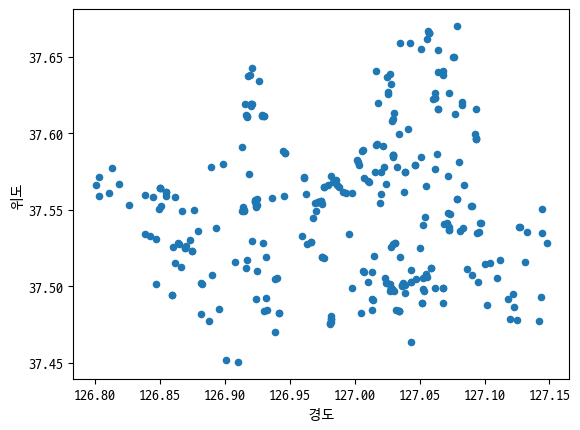

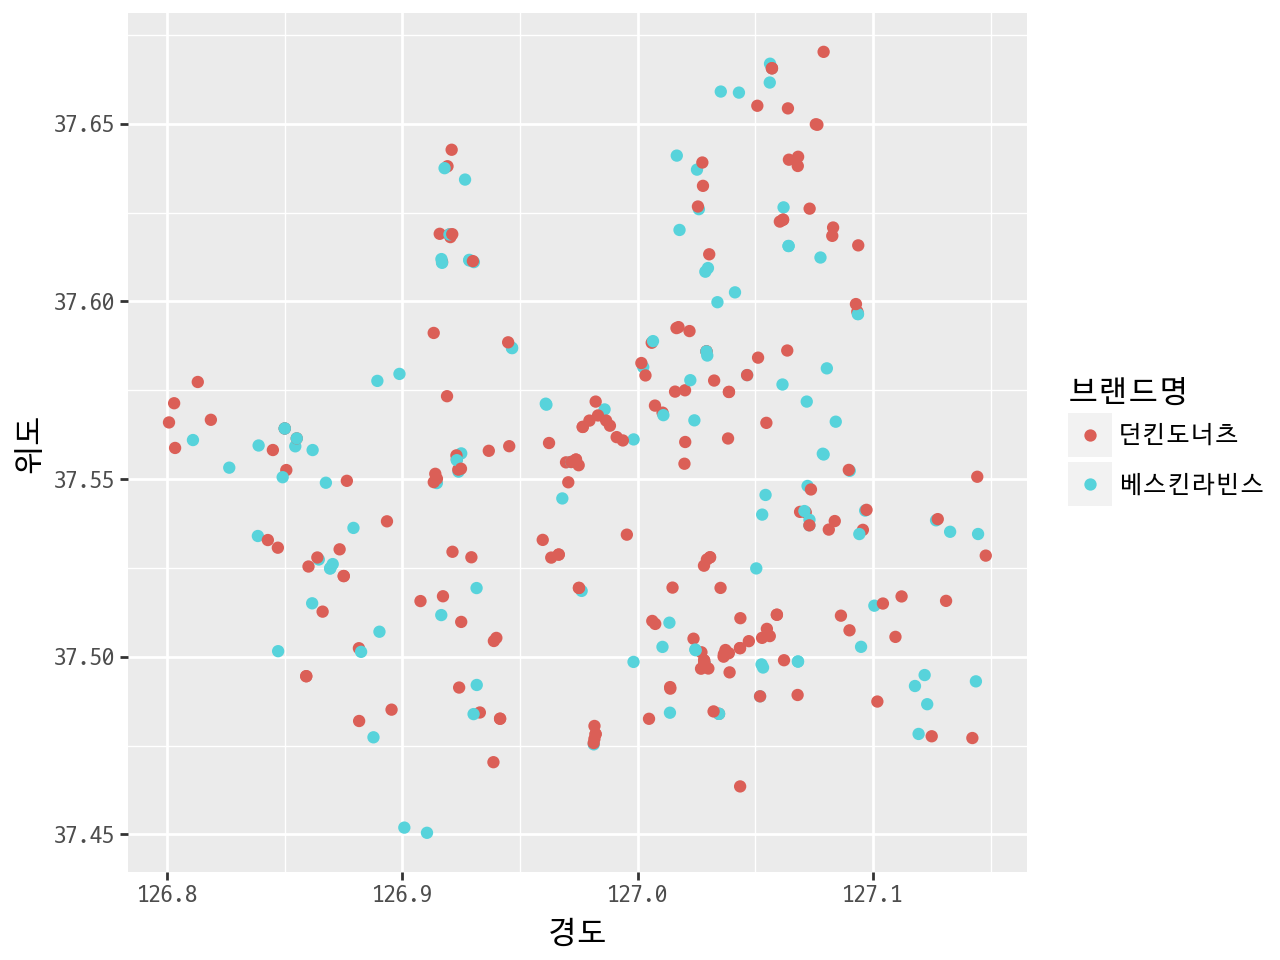

In [141]:
# 실습. df_31의 시각화(산점도)
# 1) df.plot()
df_31.plot.scatter(x='경도', y='위도')
plt.show()

# 2) ggplot()
(ggplot(df_31)
 + aes(x='경도', y='위도', color='브랜드명')
 + geom_point()
 + theme(text=element_text(family='D2Coding'))
 + scale_fill_gradient(low='red', high='green')
)

In [142]:
!pip show seaborn 

Name: seaborn
Version: 0.12.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: C:\Anaconda3\Lib\site-packages
Requires: matplotlib, numpy, pandas
Required-by: 


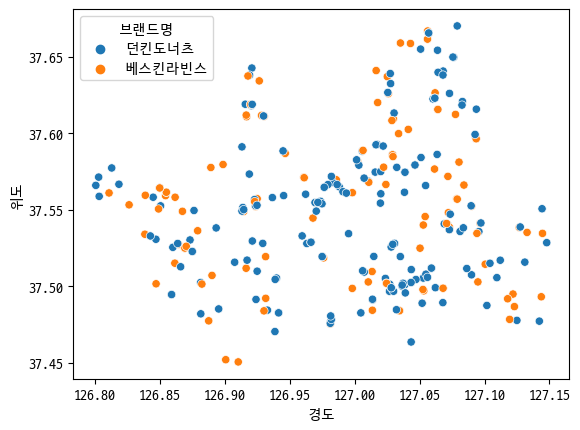

In [145]:
# seaborn 시각화 패키지(통계데이터에 특화)
import seaborn as sns
sns.scatterplot(data=df_31, x='경도', y='위도', hue='브랜드명')
plt.show()

In [160]:
# folium으로 시각화
m = folium.Map(
    location=[df_31.위도.mean(), df_31.경도.mean()],
    zoom_start=12
)

for i in df_31.index:
    popup_name = df_31.브랜드명[i] + ' : ' + df_31.도로명주소[i]
    # print(popup_name)
    # break
    if df_31.브랜드명[i] == '던킨도너츠':
        icon_color = 'blue'
    else:
        icon_color = 'red'

    folium.Marker(
        location = [df_31.위도[i], df_31.경도[i]],
        # popup = popup_name,
        popup = folium.Popup(popup_name, max_width=300),
        icon = folium.Icon(color=icon_color)
    ).add_to(m)
    
m

* 지도색상 : http://colorbrewer2.org/
* folium   : https://python-visualization.github.io/folium/quickstart.html#Choropleth-maps